In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

# del X_train,X_test

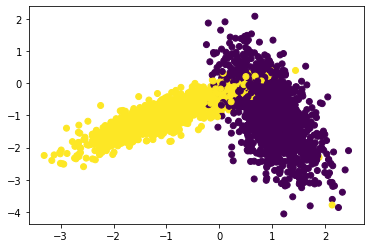

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

# Implementing Custom RandomSearchCV

In [ ]:
from sklearn.metrics import accuracy_score

def RandomSearchCV(x_train,y_train,classifier, params, folds):
    trainscores, testscores = [], []

    for k in tqdm(params):
        trainscores_folds = []
        testscores_folds = []
        
        # used to divide x_train data into train and CV datasets. 
        begin = 0
        elements_per_fold = len(x_train) // folds

        for fold in range(folds):
            test_indices = list(range(begin, begin + elements_per_fold))
            train_indices = list(set(list(range(0, len(x_train)))) - set(test_indices))
            begin += elements_per_fold

            X_train = x_train[train_indices]
            Y_train = y_train[train_indices]
            X_test  = x_train[test_indices]
            Y_test  = y_train[test_indices]

            classifier.n_neighbors = k
            classifier.fit(X_train,Y_train)

            Y_predicted = classifier.predict(X_test)
            testscores_folds.append(accuracy_score(Y_test, Y_predicted))
            Y_predicted = classifier.predict(X_train)
            trainscores_folds.append(accuracy_score(Y_train, Y_predicted))
                   
        trainscores.append(np.mean(np.array(trainscores_folds)))
        testscores.append(np.mean(np.array(testscores_folds)))
            
    return trainscores,testscores

100%|██████████| 10/10 [00:07<00:00,  1.40it/s]


Params: [3, 4, 8, 13, 14, 16, 17, 20, 21, 25]
Train scores: [0.968, 0.9624666666666667, 0.9604666666666667, 0.9592, 0.9585333333333335, 0.9579333333333334, 0.9575333333333335, 0.9568666666666666, 0.9572666666666666, 0.9575999999999999]
Test scores: [0.9464, 0.9505333333333335, 0.9523999999999999, 0.9544, 0.9545333333333333, 0.9548, 0.9545333333333333, 0.9540000000000001, 0.9541333333333334, 0.9541333333333334]


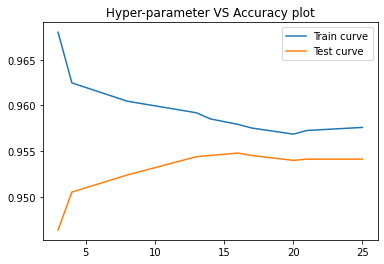

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")

neigh = KNeighborsClassifier()

param_range = (1, 25)

# generating 10 random values from param_range 
params = sorted(random.sample(range(param_range[0], param_range[1] + 1), 10))

folds = 3

trainscores, testscores = RandomSearchCV(X_train, y_train, neigh, params, folds)
print("\nParams: " + str(params))
print("Train scores: " + str(trainscores))
print("Test scores: " + str(testscores))

plt.plot(params, trainscores, label='Train curve')
plt.plot(params, testscores, label='Test curve')
plt.title('Hyper-parameter VS Accuracy plot')
plt.legend()
plt.show()

In the Hyper-parameter v/s Accuracy plot, it can be observed that gap between train and test curve is minimum when value for 'k' is 20.

In [ ]:
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

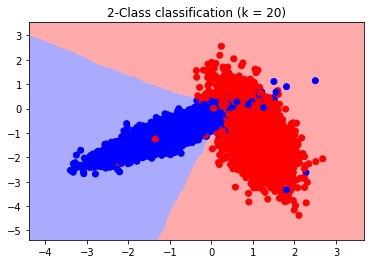

In [ ]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 20)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)